In [137]:
# Importujeme si opět knihovny jako minule
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [138]:
LEARNING_RATE = 0.1
EPOCHS = 10

def neuron_activation(percepton_value):
    # Aktivační funkce (schodková)
    return 1 if percepton_value >= 0 else 0

def train_perceptron(inputs, expected_output) -> tuple[np.ndarray, float]:
    # Implementace neuronu
    weights = np.random.rand(inputs.shape[1])
    bias = 0

    for _ in range(EPOCHS):
        for x, y in zip(inputs, expected_output):
            percepton_value = np.dot(x, weights) + bias 
            activated = neuron_activation(percepton_value)

            if y and not activated:
                weights = weights + x * LEARNING_RATE
                bias = bias + LEARNING_RATE
            
            if not y and activated:
                weights = weights - x * LEARNING_RATE
                bias = bias - LEARNING_RATE

    return weights, bias

def plot_data(points: np.ndarray, labels: np.ndarray, weights: np.ndarray, bias: int):
    # vykreslení dat
    
    _, ax = plt.subplots()
    
    # Vykreslí osy
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')

    # Vykreslí body
    for point, label  in zip(points, labels):
        color = "red" if label else "blue"
        plt.plot(point[0], point[1], c = color, marker="o")

    # Vykreslí separující přímku
    a, b = weights
    c = bias

    py_1 = (-(a * 1 + c)) / b
    py_2 = (-(a * 2 + c)) / b
    
    ax.axline((1, py_1), (2, py_2), linewidth=1, color='g')

    plt.show()

Trained weights: [-0.04341024  0.04662214].
Trained bias: 0.0
For input [0 0] neuron activated.
For input [0 1] neuron activated.
For input [1 0] neuron not activated.
For input [1 1] neuron activated.


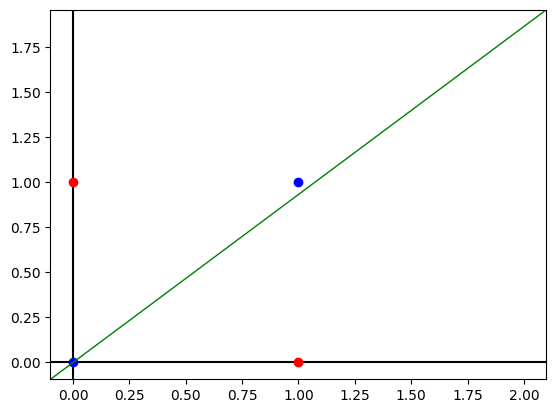

In [139]:
# (NE)naučení neuronu funkci XOR
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
expected_output = np.array([0, 1, 1, 0])

weights, bias = train_perceptron(inputs, expected_output)

print("Trained weights: {}.\nTrained bias: {}".format(weights, bias))

for x in inputs:
    percepton_value = np.dot(x, weights) + bias
    activation = neuron_activation(percepton_value)
    print("For input {} neuron {}.".format(x, "activated" if activation else "not activated"))

plot_data(inputs, expected_output, weights, bias)

In [140]:
# Keras je knihovna která nabízí stavební kameny pro tvorbu deep-learningových modelů
# Neumí pracovávat nízkoúrovňové operace (manipulace s tensory)
# proto jako backend použijeme TensorFlow.
import os

# Tento notebook je spustitelný pouze s TF na backendu.
os.environ["KERAS_BACKEND"] = "tensorflow"

import tensorflow as tf
import keras

print(f"TensorFlow version: {tf.__version__}")
print(f"Keras version: {keras.__version__}")

from keras import layers

TensorFlow version: 2.16.2
Keras version: 3.5.0


In [141]:
# Naučení sítě funkce XOR
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
expected_output = np.array([[0], [1], [1], [0]])

# Vytvoření modelu
model = keras.Sequential([
    layers.Dense(4, input_shape=[2], activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

# Konfigurace modelu pro trénování
model.compile(
	optimizer="adam",
	loss="binary_crossentropy",
)

# Trénování modelu
trained = model.fit(inputs, expected_output, verbose=False, epochs=2000)

# Vytvoření predikcí pro vstupy
predictions = model.predict(inputs, verbose=False)

for x, pred in zip(inputs, predictions):
    print(f"For input {x} network predicted {round(pred[0].item(), 3)} –> {pred[0] > 0.5}. ")

/Users/hradzpisku/Documents/Projects/UMIN/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


For input [0 0] network predicted 0.05 –> False. 
For input [0 1] network predicted 0.9 –> True. 
For input [1 0] network predicted 0.939 –> True. 
For input [1 1] network predicted 0.054 –> False. 


In [142]:
# Nyní zpět k Kosatcům (https://www.reddit.com/r/datascience/comments/x6ji1j/happy_meme_monday/)
from sklearn.datasets import load_iris
iris = load_iris()

feature_names = iris["feature_names"]
target_names = iris["target_names"]

instances_data = iris["data"] 
instances_target = iris["target"]

data = pd.DataFrame(instances_data, 
             columns=feature_names)
data["target"] = instances_target

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [143]:
data.sample(frac=0.1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
26,5.0,3.4,1.6,0.4,0
16,5.4,3.9,1.3,0.4,0
124,6.7,3.3,5.7,2.1,2
46,5.1,3.8,1.6,0.2,0
122,7.7,2.8,6.7,2.0,2
49,5.0,3.3,1.4,0.2,0
24,4.8,3.4,1.9,0.2,0
92,5.8,2.6,4.0,1.2,1
12,4.8,3.0,1.4,0.1,0
70,5.9,3.2,4.8,1.8,1


In [144]:
# Transformace cílovéno atributu, který má kategorie 1-3, na pole pravděpodobnosti příslušnosti do třídy
# Takže když má me target atribut rovný 2, tak transformace nám vrátí [0, 1, 0]
# Tomuto principu se říká one-hot encoding
target = pd.get_dummies(data["target"]).to_numpy()
target[:10]

array([[ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False]])

In [145]:
from sklearn.model_selection import train_test_split
# https://en.wikipedia.org/wiki/Training,_validation,_and_test_data_sets
# https://realpython.com/train-test-split-python-data/

x_train, x_test, y_train, y_test = train_test_split(data[feature_names], target, test_size=0.2)
print(x_train.head(1), y_train[0])

# Více o rozdělení dat:
# https://developers.google.com/machine-learning/crash-course/overfitting/dividing-datasets

    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
97                6.2               2.9                4.3               1.3 [False  True False]


In [146]:
# Vytvoření modelu

model = keras.Sequential([
    layers.Dense(8, input_shape=[x_train.shape[1]], activation="tanh"),
    layers.Dense(8, activation="tanh"),
    layers.Dense(8, activation="tanh"),
    layers.Dense(3, activation="softmax")
])

model.compile(
	optimizer="adam",
	loss="CategoricalCrossentropy",
    metrics=['binary_accuracy'],
)

trained = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=32,
    epochs=600,
    verbose=False,
)

/Users/hradzpisku/Documents/Projects/UMIN/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


<Axes: >

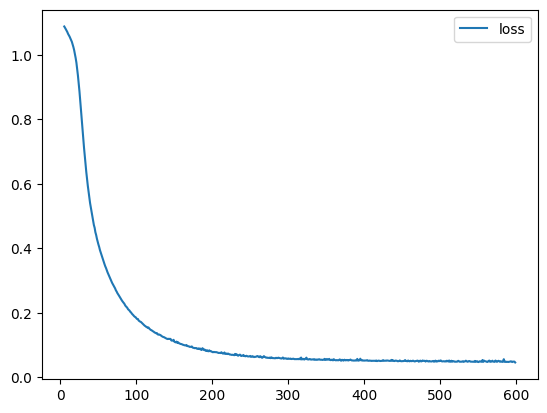

In [147]:
# „loss“ udává jak dobře si model vede na tréninkových datech

history = pd.DataFrame(trained.history)
history.loc[5:, ['loss']].plot()

In [148]:
# Vyhodnocení modelu
results = model.evaluate(x_test, y_test, batch_size=128)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 1.0000 - loss: 0.0297


In [149]:
# Co to tedy model vrací a jak jej využít?
random_ten = data.sample(frac=0.1).head(10)
random_ten

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
92,5.8,2.6,4.0,1.2,1
132,6.4,2.8,5.6,2.2,2
13,4.3,3.0,1.1,0.1,0
27,5.2,3.5,1.5,0.2,0
125,7.2,3.2,6.0,1.8,2
67,5.8,2.7,4.1,1.0,1
59,5.2,2.7,3.9,1.4,1
149,5.9,3.0,5.1,1.8,2
121,5.6,2.8,4.9,2.0,2
143,6.8,3.2,5.9,2.3,2


In [150]:
pred = model.predict(random_ten[feature_names], verbose=False)
np.round(pred, 2)

# Lze vidět, že díky softmax je součet pravděpodobností roven 1

array([[0.  , 1.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.02, 0.98],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.1 , 0.9 ],
       [0.  , 0.02, 0.98],
       [0.  , 0.  , 1.  ]], dtype=float32)